In [10]:
from datetime import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import warnings
warnings.filterwarnings('ignore')

In [2]:
FILE = '../../data/all-stocks-2006-01-01-to-2018-01-01.csv'

In [3]:
stock = pd.read_csv(FILE, index_col='Date', parse_dates=['Date'])

In [4]:
stock.head(3)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM


In [5]:
g_stock = stock.query('Name == "GOOGL"')

In [7]:
g_stock.head(3)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL


In [11]:
g_stock['Ticks'] = range(0, len(g_stock))

In [12]:
g_stock.head(3)

,Open,High,Low,Close,Volume,Name,Ticks
Date,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,0
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2


In [13]:
g_stock.tail(2)

,Open,High,Low,Close,Volume,Name,Ticks
Date,,,,,,,
2017-12-28,1062.25,1064.84,1053.38,1055.95,994249,GOOGL,3017
2017-12-29,1055.49,1058.05,1052.70,1053.40,1180340,GOOGL,3018


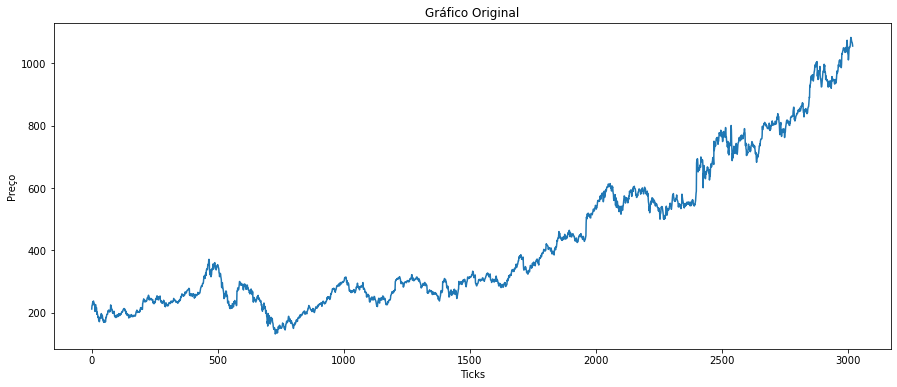

In [17]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Preço')
ax1.set_title('Gráfico Original')
ax1.plot('Ticks', 'Open', data=g_stock);

In [18]:
g_stock['Rolling_Mean'] = g_stock['Open'].rolling(window=80).mean()

In [25]:
g_stock.tail(3)

,Open,High,Low,Close,Volume,Name,Ticks,Rolling_Mean
Date,,,,,,,,
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL,3016,1010.715750
2017-12-28,1062.25,1064.84,1053.38,1055.95,994249,GOOGL,3017,1012.158125
2017-12-29,1055.49,1058.05,1052.70,1053.40,1180340,GOOGL,3018,1013.553375


In [22]:
filt_g = g_stock[(g_stock['Ticks'] >= 900) & (g_stock['Ticks'] <= 1100)]

In [24]:
filt_g.head(2)

,Open,High,Low,Close,Volume,Name,Ticks,Rolling_Mean
Date,,,,,,,,
2009-07-31,225.21,226.58,221.44,221.75,2861550,GOOGL,900,205.07250
2009-08-03,224.59,227.18,224.04,226.33,2591173,GOOGL,901,205.60575


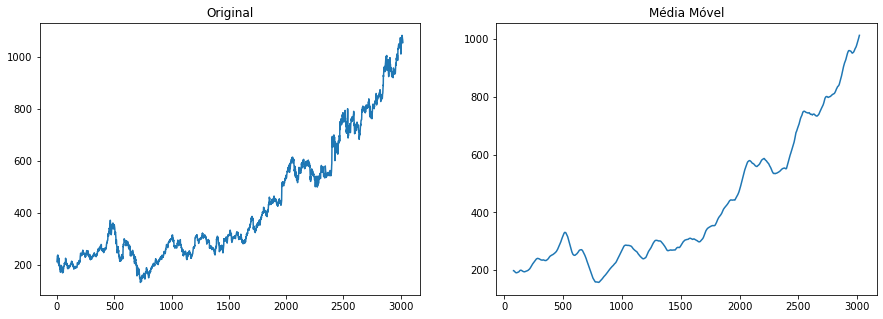

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax[0].plot('Ticks', 'Open', data=g_stock)
ax[0].set_title('Original')

ax[1].plot('Ticks', 'Rolling_Mean', data=g_stock)
ax[1].set_title('Média Móvel');

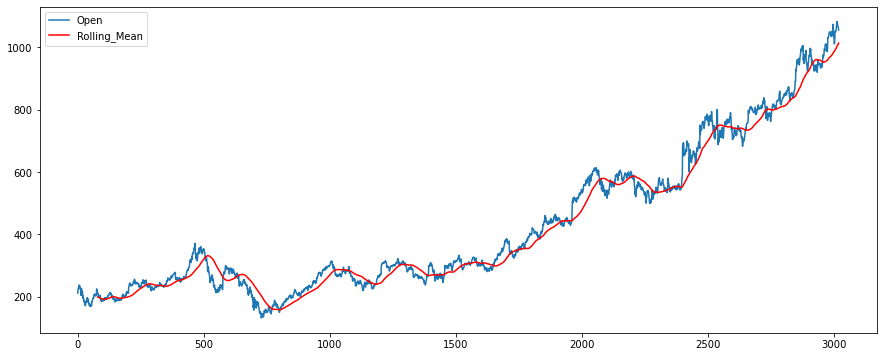

In [34]:
plt.plot('Ticks', 'Open', data=g_stock)
plt.plot('Ticks', 'Rolling_Mean', data=g_stock, color='red')
plt.legend();

In [35]:
# Calculando o erro da previsão com a média móvel

In [37]:
from sklearn.metrics import mean_absolute_error as mae

In [41]:
g_stock_pred = g_stock.dropna(subset=['Rolling_Mean'])

In [42]:
g_stock_pred.head()

,Open,High,Low,Close,Volume,Name,Ticks,Rolling_Mean
Date,,,,,,,,
2006-04-27,211.67,213.67,209.90,210.23,8359256,GOOGL,79,198.497375
2006-04-28,209.52,213.08,208.36,209.18,7425666,GOOGL,80,198.473000
2006-05-01,209.44,209.93,199.47,199.65,10367637,GOOGL,81,198.313875
2006-05-02,200.74,201.45,194.39,197.60,13108333,GOOGL,82,198.032875
2006-05-03,198.37,200.95,195.64,197.28,8075850,GOOGL,83,197.654250


In [44]:
mae_ma = mae(g_stock_pred['Open'], g_stock_pred['Rolling_Mean'])
print('MAE - Moving Average: {:.2f}'.format(mae_ma))

MAE - Moving Average: 26.38
